Delaram Rajaei 

Student ID: 110124422

Imports and libraries used in this mini-project.

In [2]:
# Imports
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import mean_squared_error, accuracy_score

Functions used in printing the dataset.

In [3]:
def print_dataset(data, num_points):
    # Print the generated data points
    for i in range(num_points):
        print(data[i])

Functions used in plotting the results.

In [4]:
def plot_model_scatter(x_predict, y_predict, plane=[0, 0, 0], text="Comparing"):
    # Plot the model
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    # Plot the data and the linear regression plane in 3D
    ax.scatter(x_predict[:, 0], x_predict[:, 1], x_predict[:, 2], c=y_predict)
    # Plot the regression plane
    ax.plot_surface(plane[0], plane[1], plane[2], alpha=0.5)
    # Set labels for the axes
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Feature 3')
    plt.title(f'Linear Regression with Three Features in 3D: {text}')
    plt.show()

def plot_model_results(predicts, labels, text):
  plt.plot(predicts, label = "Predicted", color="#A32FF3")
  plt.plot(labels, label = "Label", color="#FFC10F")
  plt.title(text)
  plt.xlabel('x-axis')
  plt.ylabel('y-axis')
  plt.legend()
  plt.grid()
  plt.show()

**Question1: Fitting a linear regression model using 20 data points with 3 features.**

First, we generate a dataset (x) with `np.random.rand()` function.

For generating the labels (y) we use the given formula:

`y = np.dot(x, coefficients) + bias + noise`


*   **Coefficients:** Predefined array used as coefficients.
*   **Bias:** The bias term allows the model to make predictions even when all the feature values are zero. It captures the inherent bias or baseline level of the target variable, independent of the feature values. The bias term effectively shifts the regression line or hyperplane up or down along the y-axis.
*   **Noise:** By adding the noise to the predicted labels, the code creates a more realistic simulation of data where the labels are not solely determined by the features and coefficients but also contain some random fluctuations. This helps make the generated data points more representative of real-world situations and introduces some level of uncertainty into the model's predictions.

Afterwards, the data is splitted between train and test. After training the linear regression model, the model is tested and mean squared error is calculated.

I also test the model with 100 random generated data. At last the results are plotted.

Coefficients:[ 2.05769869 -1.09427439  3.14582328]
The mean squared error for training is 0.11977494390786345
The mean squared error for testing is 0.08223878138560574


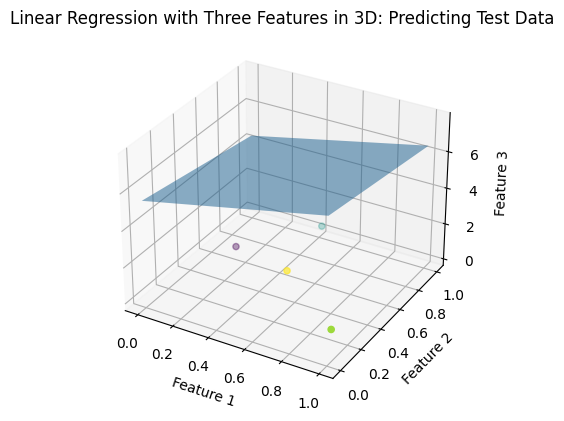

---------------------------------------------------------------------


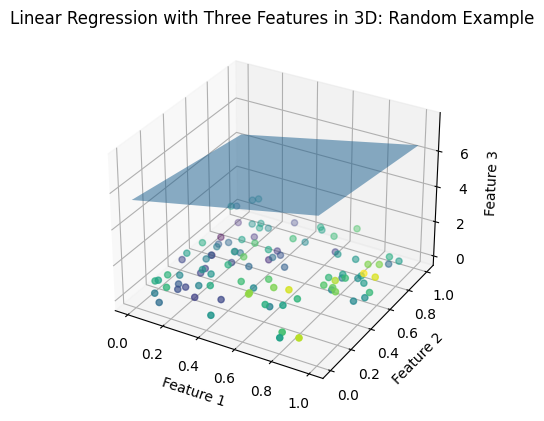

---------------------------------------------------------------------


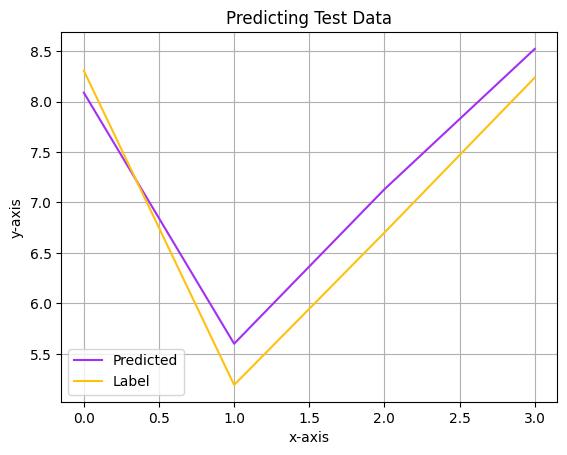

---------------------------------------------------------------------


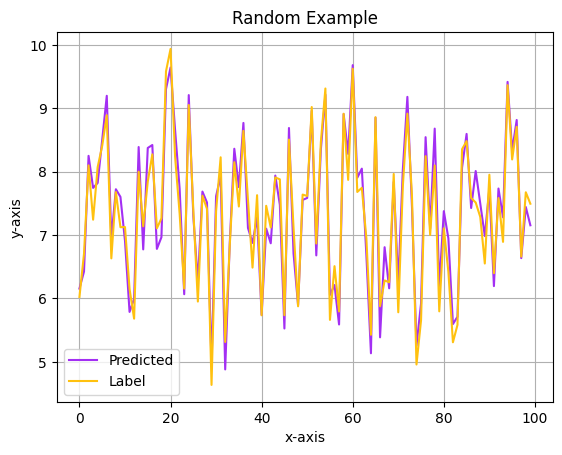

In [5]:
# Question 1
# Fitting a linear regression model using 20 data points with 3 features.
num_points = 20 
num_features = 3
num_test = 100

# Generate sample data and train model
x = np.random.rand(num_points, num_features)

# Generate labels for the data points
# Constants
coefficients = np.array([2, -1, 3])  # Coefficients for each feature
bias = 5  # Intercept term
noise = np.random.rand(num_points)  # Random noise
y = np.dot(x, coefficients) + bias + noise

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize a model
model = LinearRegression()
# Fit the model to the data
model.fit(x_train, y_train)
# Print the model coefficients
print(f"Coefficients:{model.coef_}")

# Test the model
y_test_predict = model.predict(x_test)
mse = mean_squared_error(y_test, y_test_predict)
print(f'The mean squared error for training is {mse}')

# Generate and predict new data points 
x_random = np.random.rand(num_test, num_features)
noise = np.random.rand(num_test)  # Random noise
y_random = np.dot(x_random, coefficients) + bias + noise
y_random_predict = model.predict(x_random)

# Calculate MSE
mse = mean_squared_error(y_random, y_random_predict)
print(f'The mean squared error for testing is {mse}')

# Create a meshgrid to plot the regression plane
x1, x2 = np.meshgrid(np.linspace(0, 1, 2), np.linspace(0, 1, 2))
yy = model.coef_[0] * x1 + model.coef_[1] * x2 + model.intercept_
plane = [x1, x2, yy]

# Plot the results
plot_model_scatter(x_test, y_test_predict, plane, "Predicting Test Data")
print("---------------------------------------------------------------------")
plot_model_scatter(x_random, y_random, plane, "Random Example")
print("---------------------------------------------------------------------")
plot_model_results(y_test_predict, y_test, "Predicting Test Data")
print("---------------------------------------------------------------------")
plot_model_results(y_random_predict, y_random, "Random Example")

Due to randomness of data, everytime we run the code, the result would be different.

`build_design_matrix` function takes an input array x and constructs a design matrix X where each column represents a different power of x up to the specified degree. This design matrix can be used as input for polynomial regression or other models that require polynomial features.

`input_matrix_polynomial` function constructs a design matrix x_ that combines multiple design matrices generated by the build_design_matrix function for each feature of the input array x. The design matrices are concatenated horizontally based on the specified degree, resulting in a matrix suitable for polynomial regression with multiple features.

In [6]:
def build_design_matrix(x, degree):
  X = np.column_stack([np.power(x, i) for i in range(1, degree + 1)])
  return X

def input_matrix_polynimal(x, degree, num_features):
  x_ = np.ones((x.shape[0], (num_features*degree) + 1))
  for i in range(num_features):
    x_[:, i*degree: (i+1)*degree] = build_design_matrix(x[:, i], degree)
  return x_

First, we generate a dataset (x) with `np.random.rand()` function.

For generating the labels (y) we use the given formula:

`y = np.polyval(coefficients, x) + bias + noise`

Afterwards, I create an instance of PolynomialFeatures and sets the degree of our polynomial function to 5. Then I `apply fit_transform()'` to train dataset.

*   fit(): we basically just declare what feature we want to transform
*   transform(): transform method is used to apply the polynomial features transformation to the input data.

After creating polynomial features, the data in given to the model for training. And the result are plotted at the end.


Coefficients:[ 0.16654858 -0.00120895 -0.00567874 ... -0.01419639  0.01984495
  0.        ]
The mean squared error for training is 2.2364617528070486e-28
The mean squared error for testing is 17.71396339631473


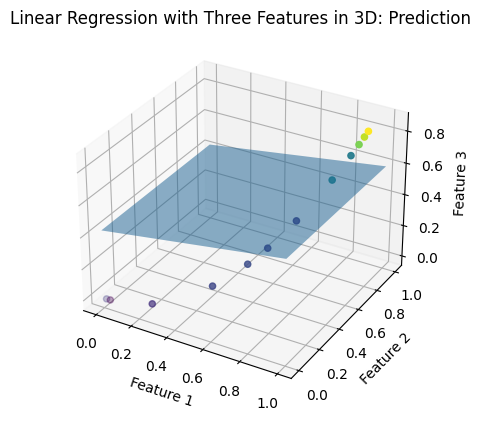

---------------------------------------------------------------------


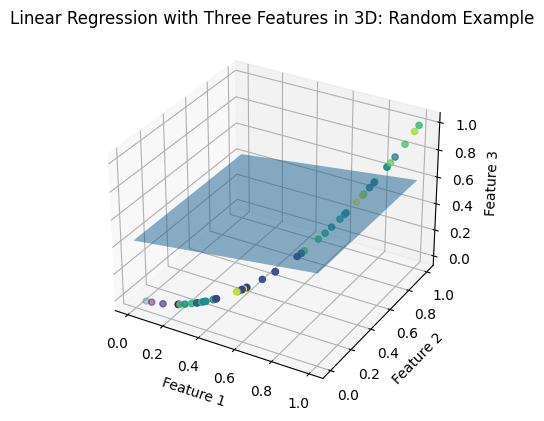

---------------------------------------------------------------------


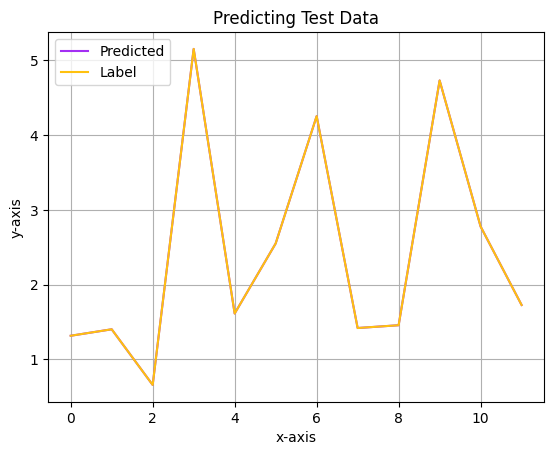

---------------------------------------------------------------------


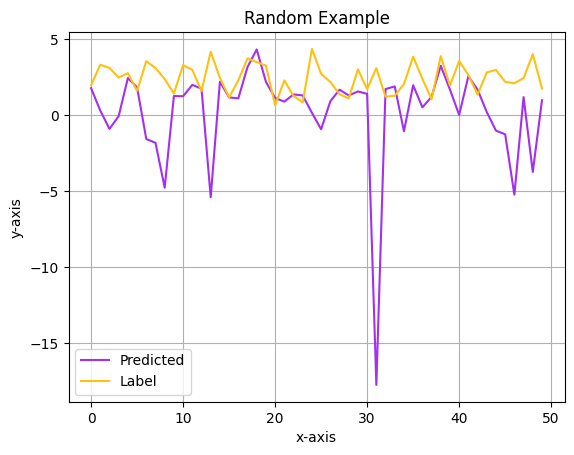

In [7]:
# Question 2
# Fitting a polynomial regression model using 20 data points with 5 features.

num_points = 12
num_features = 2
num_test = 50
degree = 5

# Generate sample data and train model
x = np.random.rand(num_points, num_features)

# Generate labels for the data points
# coefficients = [2, -1, 3] # Coefficients for each feature
coefficients = np.random.rand((num_features*degree) + 1)

x_matrix = input_matrix_polynimal(x, degree, num_features)

noise = np.random.rand(num_points)  # Random noise
y = np.dot(x_matrix, coefficients) + noise
# For testing
# y = np.ones((x_matrix.shape[0],), dtype=np.float32)

# Initialize a Polynomial Features
poly = PolynomialFeatures(degree, include_bias=False)
# Create polynomial features
x_poly = poly.fit_transform(x_matrix)

# Fit polynomial regression model
poly_reg_model = LinearRegression()
poly_reg_model.fit(x_poly, y)

# Print the model coefficients
print(f"Coefficients:{poly_reg_model.coef_}")

# Test the model
y_predict = poly_reg_model.predict(x_poly)

# Calculate MSE
mse = mean_squared_error(y, y_predict)
print(f'The mean squared error for training is {mse}')

# Generate and predict new data points 
x_random = np.random.rand(num_test, num_features)
noise = np.random.rand(num_test)  # Random noise

x_random_matix = input_matrix_polynimal(x_random, degree, num_features)

y_random = np.dot(x_random_matix, coefficients) + noise
# For testing
# y_random = np.ones((x_random.shape[0],), dtype=np.float32)

x_random_poly = poly.transform(x_random_matix)
y_random_predict = poly_reg_model.predict(x_random_poly)

# Calculate MSE
mse = mean_squared_error(y_random, y_random_predict)
print(f'The mean squared error for testing is {mse}')

# Create a meshgrid to plot the regression plane
x1, x2 = np.meshgrid(np.linspace(0, 1, 2), np.linspace(0, 1, 2))
yy = poly_reg_model.coef_[0] * x1 + poly_reg_model.coef_[1] * x2 + poly_reg_model.intercept_
plane = [x1, x2, yy]

# Plot the results
plot_model_scatter(x_poly, y_predict, plane, "Prediction")
print("---------------------------------------------------------------------")
plot_model_scatter(x_random_poly, y_random, plane, "Random Example")
print("---------------------------------------------------------------------")
plot_model_results(y_predict, y, "Predicting Test Data")
print("---------------------------------------------------------------------")
plot_model_results(y_random_predict, y_random, "Random Example")

In this code, the shapes represent the data points plotted in the scatter plot.


*   X[:, 0] corresponds to the values of the first feature for all data points in X.
*   X[:, 1] corresponds to the values of the second feature for all data points in X.

**Method 1**

When you plot X[:, 0] against X[:, 1], each data point is represented by a point on the scatter plot. The shape of each point is determined by the marker used in the scatter plot function.

In the case of this code, the training data points are plotted using circles ('o' marker), and the test data points with their predicted labels are plotted using squares ('s' marker).

The c=y and c=y_pred parameters in the plt.scatter functions determine the color of each data point based on the corresponding labels (y for training data and y_pred for test data). The colormap specified with cmap maps the labels to different colors in the plot.

By using different shapes and colors, the scatter plot visually represents the distribution and classification of the data points in the feature space.

**Method 2**

In this modified code, the training data points are plotted using blue circles ('o' marker) for class 0 and blue triangles ('^' marker) for class 1. The test data points and their predicted labels are plotted using red squares ('s' marker) for class 0 and red triangles ('^' marker) for class 1.

The colors (c) for both training and test data points are set to blue and red, respectively. The colormap (cmap) is set to plt.cm.Paired to ensure that the colors are distinguishable.

By using different shapes and colors, the scatter plot now represents the labels (class) with shapes and distinguishes the training and test datasets with colors.

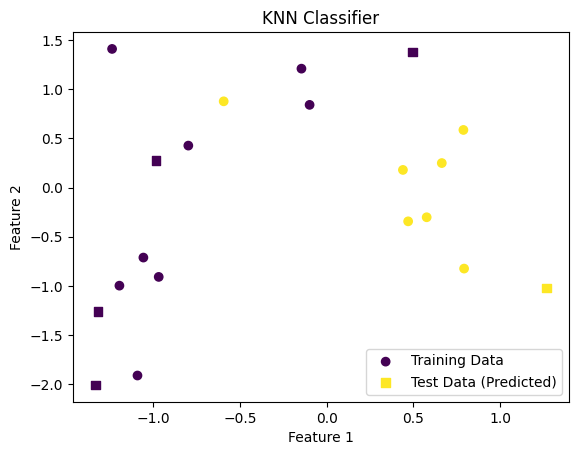

<ipython-input-17-2b05fda4d393>:52: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], c='blue', label='Training Data', marker='o', cmap=plt.cm.Paired)
<ipython-input-17-2b05fda4d393>:55: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_test[:, 0], X_test[:, 1], c='red', label='Test Data (Predicted)', marker='o', cmap=plt.cm.Paired)


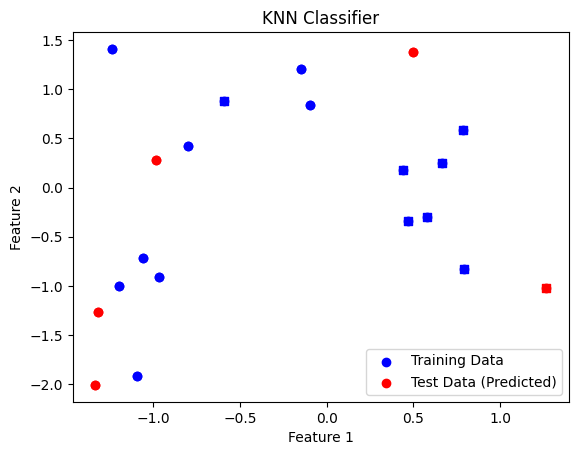

In [17]:
# Question 3
# Fitting a k-neareast neighbors model using 20 data points with 3 features.
# Generate random data points with 2 features and labels
np.random.seed(42)
num_points = 15
num_features = 2

X, y = make_classification(
    n_samples=num_points,
    n_features=num_features,
    n_informative=num_features,
    n_redundant=0,
    random_state=42
)

# Create a KNN classifier with k=3
knn = KNeighborsClassifier(n_neighbors=3)

# Fit the KNN model to the data
knn.fit(X, y)

# Generate test data points for prediction
X_test, y_test = make_classification(
    n_samples=5,
    n_features=num_features,
    n_informative=num_features,
    n_redundant=0,
    random_state=42
)

# Method 1
# Predict the labels for the test data points
y_pred = knn.predict(X_test)

# Plot the training data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', label='Training Data')

# Plot the test data points and their predicted labels
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='viridis', marker='s', label='Test Data (Predicted)')

# Set plot labels and legend
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('KNN Classifier')
plt.legend()

# Show the plot
plt.show()

# Method 2
# Plot the training data points
plt.scatter(X[:, 0], X[:, 1], c='blue', label='Training Data', marker='o', cmap=plt.cm.Paired)

# Plot the test data points and their predicted labels
plt.scatter(X_test[:, 0], X_test[:, 1], c='red', label='Test Data (Predicted)', marker='o', cmap=plt.cm.Paired)

# Set the shape of training data points based on labels (class)
for i in range(num_points):
    if y[i] == 0:
        plt.scatter(X[i, 0], X[i, 1], color='blue', marker='o')
    else:
        plt.scatter(X[i, 0], X[i, 1], color='blue', marker='s')

# Set the shape of test data points based on predicted labels (class)
for i in range(X_test.shape[0]):
    if y_pred[i] == 0:
        plt.scatter(X_test[i, 0], X_test[i, 1], color='red', marker='o')
    else:
        plt.scatter(X_test[i, 0], X_test[i, 1], color='red', marker='s')

# Set plot labels and legend
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('KNN Classifier')
plt.legend()

# Show the plot
plt.show()
